# 19.3 Assumptions of Linear Regression Assignment 2
## 2. House prices
To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

    1. Load the houseprices data from Thinkful's database.
    2. Reimplement the model you built in the previous checkpoint.
    3. Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

## Import the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import bartlett
from scipy.stats import levene
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


## Regression Model
Looking at the correlation of the values above the biggest indicators of sales price is overall quality, total basement square feet, first floor square feet, living area square feet, garage car capacity, and garage square feet. 

In [3]:
# Target variable
Y = df['saleprice']

# Regression features
X = df[['overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea',
      'garagecars', 'garagearea']]

# Linear Regression model object
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

X_ols = sm.add_constant(X)

results = sm.OLS(Y, X_ols).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     775.0
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:51:47   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.027e+05   4903.994    -20.932      0.000   -1.12e+05    -9.3e+04
overallqual    2.4e+04   1083.393     22.150      0.000    2.19e+04    2.61e+04
totalbsmtsf    24.3908      4.318      5.649      0.000      15.921      32.860
firstflrsf     11.1859      5.032      2.223      0.026       1.315      21.057
grlivarea      43.1229      2.679     16.095      0.000      37.867      48.379
garagecars   1.452e+04   3018.621      4.809      0.000    8593.872    2.04e+04
garagearea     15.6639     10.475      1.495      0.135      -4.884      36.212
==============================================================================
Omnibus:                      431.781   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39208.253
Skew:                          -0.313   Prob(JB):                         0.00
Kurtosis:                      28.380   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumption 1: Linearity of the Model in its Coefficients
The chart below shows the linearity of the model. 

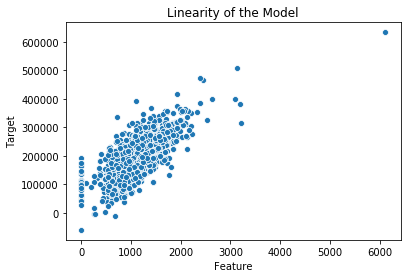

In [11]:
# predictions of the linear regression
predictions = lrm.predict(X)

# we plot the estimated Y and X
# the relationship should be quadratic
sns.scatterplot(df['totalbsmtsf'], predictions)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title('Linearity of the Model')
plt.show()

## Assumption 2: The Error term Should be Zero
Looking at the mean of the errors below, the error term is so small that the error term is essentially zero. This assumptions shows the correctness of the model.

In [5]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the house price model is: {}".format(np.mean(errors)))

Mean of the errors in the house price model is: 2.1528860885803012e-11


## Assumption 3: Homoscedasticity
Looking at the barlett and levene tests below, the p-value is zero, which means we reject the null hypothesis and the model is heteroscedastic. This means the the error term is not constant accross all features. 

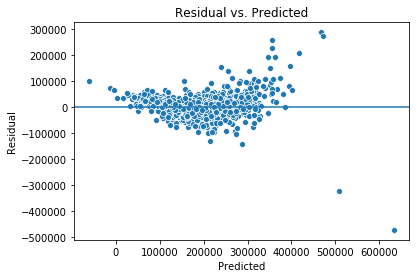

In [6]:
sns.scatterplot(predictions, errors)

plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')

plt.axhline(y=0)
plt.show()

In [7]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 467.831 and p value is 9.5e-104
Levene test statistic value is 448.758 and p value is 9.19e-93


## Assumption 4: Low Multicollinearity
Looking at the heatmap below, most of the features are somewhat correlated to one another with the most being 'totalbsmtsf' and 'firstflrsf'. The correlation of these two variables is .82, which means that it makes it harder for the model to estimate the relationship between each independent variable and the dependent variable.

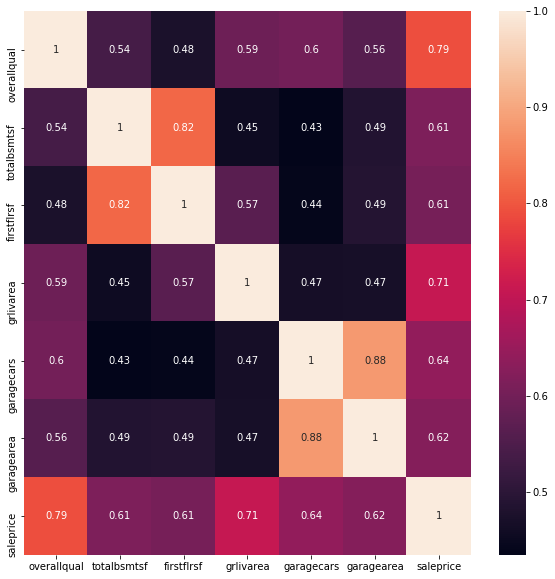

In [8]:
variables = df[['overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea',
      'garagecars', 'garagearea', 'saleprice']]

plt.figure(figsize=(10,10))
sns.heatmap(variables.corr(), annot=True)
plt.show()

## Assumption 5: Uncorrelated Error Terms
The errors are uncorrelated with one another as shown in the acf chart below. The correlation ranges from -.06 to .06, which signifies that the errors are not correlated with one another. 

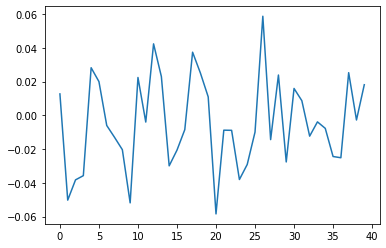

In [9]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

## Assumption 6: Features not Correlated with Errors
The features are not highly correlated with errors in the heatmap below. This means that the errors and features are independent from one another.

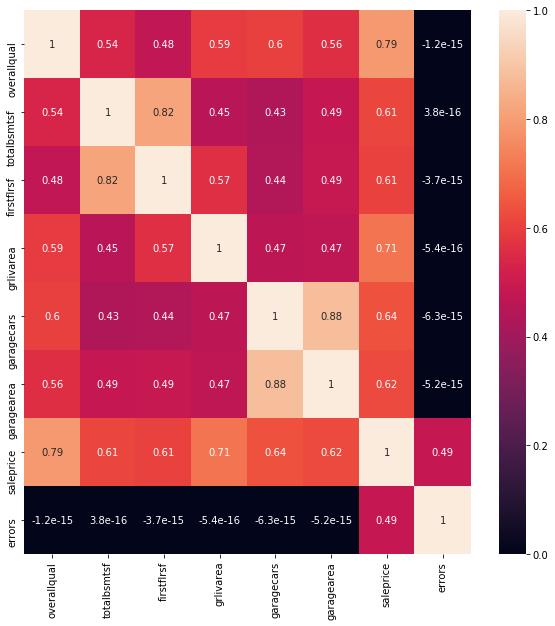

In [10]:
variables['errors'] = errors

plt.figure(figsize=(10,10))
sns.heatmap(variables.corr(), annot=True)
plt.tight_layout
plt.show()

## Conclusion
Overall, the model fit most of the Gauss-Markov conditions. There were several assumptions where the model did not met the assumptions. The implicaitons of those will be dicussed here. Assumption 3, homoscedasiticity, was not met. This indicates that the error term is not equal throughout all the terms. This can bias the results and lead to incorrect conclusions about the regression coefficients. The other failed assumption is assumption 4, low multicollinearity. Most of the variables are somewhat correlated to one another and two are highly correlated to one another. One solution to this problem is to combine the variables together into one feature using PCA. Another solution could be to drop one of the variables from the model.  